In [1]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("AI_Human.csv")
df

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [4]:
df.describe()

,generated
count,487235.000000
mean,0.372383
std,0.483440
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<Axes: xlabel='generated', ylabel='count'>

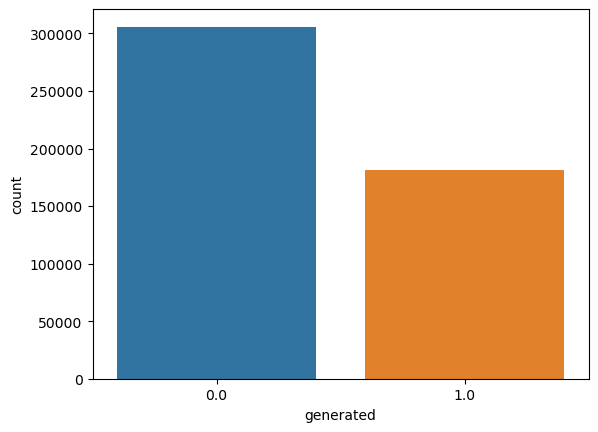

In [5]:
# show the amount of human-written and ai-written essays
sns.countplot(data=df,x='generated')

In [6]:
print('Total Texts:', df['generated'].count())
print('Human Written Texts:', (df['generated'] == 0.0).sum())
print('AI Generated Texts:', (df['generated'] == 1.0).sum())

Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


In [7]:
# function to remove all unecessary tags such as new-line, tabulation, slash etc
def remove_tags(text):
    tags = ['\n', '\'']
    for tag in tags:
        text = text.replace(tag, '')
    
    return text


df['text'] = df['text'].apply(remove_tags)

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
# remove all punctuation signs in all texts
def remove_punc(text):
    new_text = [x for x in text if x not in string.punctuation]
    new_text = ''.join(new_text)
    return new_text

df['text']=df['text'].apply(remove_punc)

In [10]:
import nltk
from nltk.corpus import words

nltk.download('words')
english_words = set(words.words())


def is_spelled_correctly(word):
    return word in english_words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


In [11]:
word_to_check = df['text'][487232]
if is_spelled_correctly(word_to_check):
    print(f"The word '{word_to_check}' is spelled correctly.")
else:
    print(f"The word '{word_to_check}' is spelled incorrectly.")

The word 'I firmly believe that governments worldwide should take immediate action to address the pressing issue of climate change as the consequences of inaction with be catastrophic for the planet and future generations There are several competing reasons that support my positionFirstly climate change poses a significant threat to our natural environment The earths temperature is rising at an alarming rate resulting in meeting ice caps rising sea Levels and an increase in extreme weather events such as hurricanes droughts and heatwaves These environmental changes have a devastating impact on ecosystems resulting in the Loss of biodiversity habitat destruction and species extinction For example the Great Barrier Reef one of the most biodiverse ecosystems on the planet has seen a significant decline in recent years due to coral bleaching caused by warming ocean temperaturesSecondly the negative impacts of climate change extend beyond environmental concerns affecting human health and ec

In [12]:
# from nltk.corpus import stopwords
# nltk.download('stopwords')

# def remove_stopwords(text):
#     stop_words = set(stopwords.words('english'))
#     words = nltk.word_tokenize(text)
#     filtered_words = [word for word in words if word.lower() not in stop_words]
#     filtered_words= ' '.join(filtered_words)
#     return filtered_words
# # 
# df['text']=df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\User/nltk_data'
    - 'D:\\anaconda3\\nltk_data'
    - 'D:\\anaconda3\\share\\nltk_data'
    - 'D:\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [13]:
# divide data to X and y

y=df['generated']
X=df['text']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [15]:
print(len(X_train))
print(len(y_train))

341064
341064


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [17]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),  # Step 1: CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # Step 2: TF-IDF Transformer
    ('naive_bayes', MultinomialNB())])

In [19]:
# Обучение pipeline на тренировочных данных
pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('naive_bayes', MultinomialNB())])

In [20]:
y_pred= pipeline.predict(X_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     91597
         1.0       0.99      0.87      0.93     54574

    accuracy                           0.95    146171
   macro avg       0.96      0.93      0.94    146171
weighted avg       0.95      0.95      0.95    146171



In [33]:

custom_text = """In simple words"""

count_vectorizer = pipeline.named_steps['count_vectorizer']
tfidf_transformer = pipeline.named_steps['tfidf_transformer']

transformed_text = count_vectorizer.transform([custom_text])

transformed_text = tfidf_transformer.transform(transformed_text)

prediction = pipeline.named_steps['naive_bayes'].predict(transformed_text)

print("Prediction:", prediction)


Предсказание: [1.]


In [34]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [35]:
import joblib

# Сохранение Pipeline в файл
joblib.dump(pipeline, 'AI_Human_Prediction_Model.pkl')

['AI_Human_Prediction_Model.pkl']